In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
data.shape

(45211, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
data = data.drop('default',axis=1)
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
pd.crosstab(data['job'],data['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


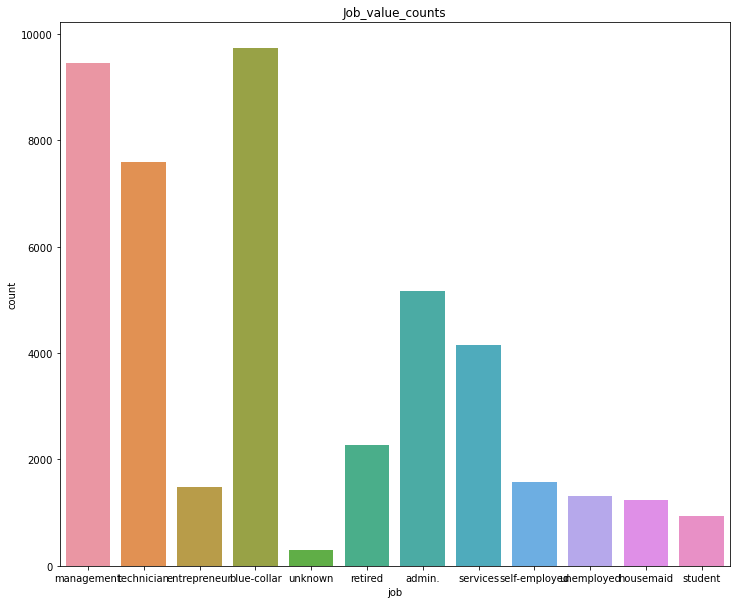

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(x=data['job'])
plt.title('Job_value_counts')
plt.show()

In [12]:
pd.crosstab(data['marital'],data['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


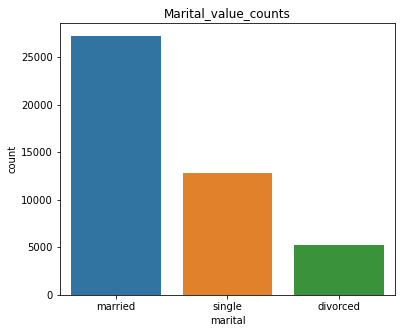

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x=data['marital'])
plt.title('Marital_value_counts')
plt.show()

In [14]:
pd.crosstab(data['education'],data['y'])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


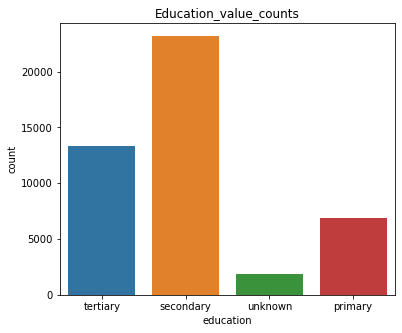

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x=data['education'])
plt.title('Education_value_counts')
plt.show()

In [16]:
pd.crosstab(data['housing'],data['y'])

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


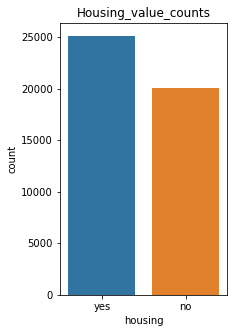

In [17]:
plt.figure(figsize=(3,5))
sns.countplot(x=data['housing'])
plt.title('Housing_value_counts')
plt.show()

In [18]:
pd.crosstab(data['loan'],data['y'])

y,no,yes
loan,,
no,33162,4805
yes,6760,484


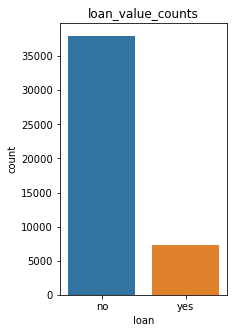

In [19]:
plt.figure(figsize=(3,5))
sns.countplot(x=data['loan'])
plt.title('loan_value_counts')
plt.show()

In [20]:
pd.crosstab(data['contact'],data['y'])

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


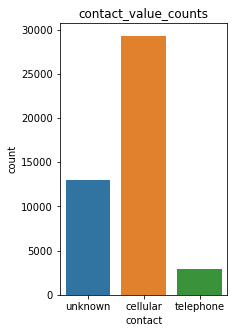

In [21]:
plt.figure(figsize=(3,5))
sns.countplot(x=data['contact'])
plt.title('contact_value_counts')
plt.show()

In [22]:
pd.crosstab(data['poutcome'],data['y'])

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


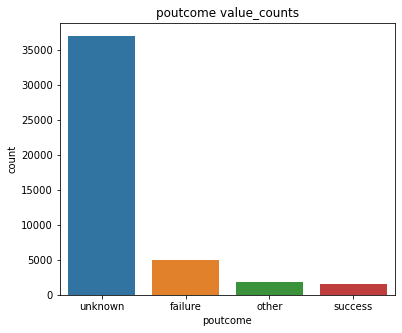

In [23]:
plt.figure(figsize=(6,5))
sns.countplot(x=data['poutcome'])
plt.title('poutcome value_counts')
plt.show()

In [24]:
le = LabelEncoder()

In [25]:
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education'])
data['housing']= le.fit_transform(data['housing'])
data['loan'] =le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['day'] = le.fit_transform(data['day'])
data['month'] = le.fit_transform(data['month'])
data['poutcome']= le.fit_transform(data['poutcome'])
data['y']=le.fit_transform(data['y'])

In [26]:
data

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,2,4,8,261,1,-1,0,3,0
1,44,9,2,1,29,1,0,2,4,8,151,1,-1,0,3,0
2,33,2,1,1,2,1,1,2,4,8,76,1,-1,0,3,0
3,47,1,1,3,1506,1,0,2,4,8,92,1,-1,0,3,0
4,33,11,2,3,1,0,0,2,4,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,16,9,977,3,-1,0,3,1
45207,71,5,0,0,1729,0,0,0,16,9,456,2,-1,0,3,1
45208,72,5,1,1,5715,0,0,0,16,9,1127,5,184,3,2,1
45209,57,1,1,1,668,0,0,1,16,9,508,4,-1,0,3,0


In [27]:
x = data.drop('y',axis=1)
y = data[['y']]

In [28]:
std_scalar = StandardScaler()
x_scaled = std_scalar.fit_transform(x)
x_scaled =pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,-0.103820,-0.275762,1.036362,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.251940,0.444898
1,0.288529,1.424008,1.368372,-0.300556,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.251940,0.444898
2,-0.747384,-0.714951,-0.275762,-0.300556,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.707361,-0.569351,-0.411453,-0.251940,0.444898
3,0.571051,-1.020516,-0.275762,2.373280,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.645231,-0.569351,-0.411453,-0.251940,0.444898
4,-0.747384,2.035139,1.368372,2.373280,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.233620,-0.569351,-0.411453,-0.251940,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,-0.275762,1.036362,-0.176460,-1.118674,-0.436803,-0.713012,0.143418,1.156344,2.791329,0.076230,-0.411453,-0.251940,0.444898
45207,2.831227,0.201746,-1.919895,-1.637474,0.120447,-1.118674,-0.436803,-0.713012,0.143418,1.156344,0.768224,-0.246560,-0.411453,-0.251940,0.444898
45208,2.925401,0.201746,-0.275762,-0.300556,1.429593,-1.118674,-0.436803,-0.713012,0.143418,1.156344,3.373797,0.721811,1.436189,1.050473,-0.566175
45209,1.512791,-1.020516,-0.275762,-0.300556,-0.228024,-1.118674,-0.436803,0.400647,0.143418,1.156344,0.970146,0.399020,-0.411453,-0.251940,0.444898


In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.20,random_state =0)

In [30]:
x_train.shape,y_train.shape

((36168, 15), (36168, 1))

In [31]:
x_test.shape,y_test.shape

((9043, 15), (9043, 1))

In [32]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred_train = classifier.predict(x_train)

In [34]:
from sklearn.metrics import accuracy_score
print(f'training-set accuracy score: {round(accuracy_score(y_train,y_pred_train),3)}')

training-set accuracy score: 0.888


In [35]:
y_pred_test = classifier.predict(x_test)

In [36]:
print(f'Test-set accuracy score:{round(accuracy_score(y_test,y_pred_test),3)}')

Test-set accuracy score:0.885


In [37]:
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_train,y_pred_train)

print('Confusion matrix:\n\n',cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP)=',TP)

print('\nTrue Negatives=(TN)',TN)

print('\nFalse Positives(FP)=',FP)

print('\nFalse Negatves(FN)=',FN)



Confusion matrix:

 [[31387   555]
 [ 3493   733]]

True Positives(TP)= 31387

True Negatives=(TN) 733

False Positives(FP)= 555

False Negatves(FN)= 3493


In [39]:
from sklearn.metrics import roc_auc_score,roc_curve

auc = roc_auc_score(y_train,y_pred_train)
print('Auc:',auc)

Auc: 0.5780374141809266


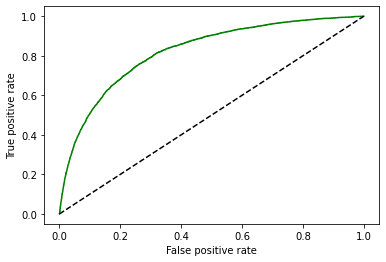

In [40]:
fpr,tpr,thresholds = roc_curve(y_train,classifier.predict_proba(x_train)[:,1])

plt.plot(fpr,tpr,color = 'green',label ='logit model (area = %0.2f)'%auc)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [41]:
y_pred_test =classifier.predict(x_test)

In [42]:
print('Accuracy_score:',accuracy_score(y_test,y_pred_test))

print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy_score: 0.8853256662611965
Confusion matrix:
 [[7833  147]
 [ 890  173]]


In [43]:
auc = roc_auc_score(y_test,y_pred_test)
print('Auc:',auc)

Auc: 0.5721629449918305


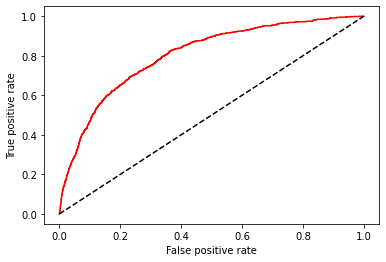

In [44]:
fpr,tpr,thresholds = roc_curve(y_test,classifier.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()